In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()
train_path = 'src/resources/train.csv'
test_path = 'src/resources/test.csv'

In [3]:
data_train = pd.read_csv('src/main/resources/train.csv')
data_test = pd.read_csv('src/main/resources/test.csv')

In [4]:
data_train.columns

Index(['emotion', 'pixels'], dtype='object')

In [5]:
data_test.columns

Index(['pixels'], dtype='object')

In [6]:
data_train.count()

emotion    28709
pixels     28709
dtype: int64

# Data Distribution of Target Variable

In [15]:
# Check if 'emotion' column exists in the DataFrames
if 'emotion' not in data_train.columns:
    raise KeyError("The 'emotion' column is missing from the dataset.")

In [7]:
data_train.emotion.value_counts()

emotion
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: count, dtype: int64

<Axes: xlabel='emotion'>

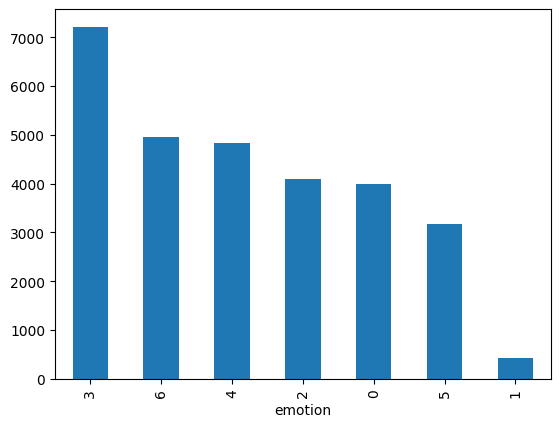

In [8]:
data_train.emotion.value_counts().plot(kind='bar')

# fix the data distribition by oversampling

In [10]:
from sklearn.utils import resample

# Calculate the maximum count of samples in any class
max_count = data_train['emotion'].value_counts().max()

In [11]:
# Function to oversample a dataframe to the desired count
def oversample(df, count):
    return resample(df, replace=True, n_samples=count, random_state=42)


In [15]:
# Oversample each class to match the maximum count
df_0_oversampled = oversample(df_0, max_count)
df_1_oversampled = oversample(df_1, max_count)
df_2_oversampled = oversample(df_2, max_count)
df_3_oversampled = oversample(df_3, max_count)
df_4_oversampled = oversample(df_4, max_count)
df_5_oversampled = oversample(df_5, max_count)
df_6_oversampled = oversample(df_6, max_count)

In [16]:

# Concatenate all oversampled dataframes to create a balanced dataset
data_train_balanced = pd.concat([df_0_oversampled, df_1_oversampled, df_2_oversampled, df_3_oversampled, df_4_oversampled, df_5_oversampled, df_6_oversampled])

# Shuffle the balanced dataset
data_train_balanced = data_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

<Axes: xlabel='emotion'>

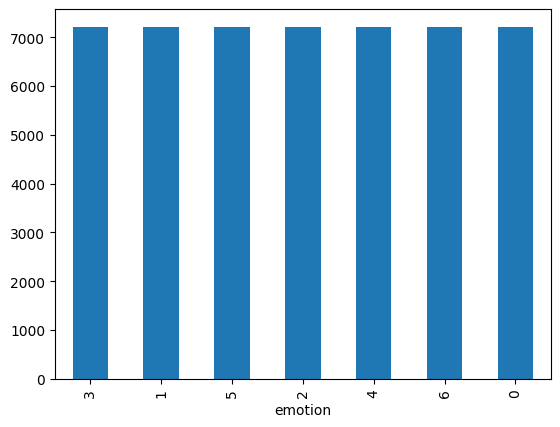

In [17]:
data_train_balanced.emotion.value_counts().plot(kind='bar')